# Introduction
I love the idea of smart cities. The thought of automated smart energy systems, electrical grids, one-touch access ports – it’s an enthralling concept! Honestly, it’s a dream for a data scientist and I’m delighted that a lot of cities around the world are moving towards becoming smarter.

One of the core components of a smart city is automated traffic management. And that got me thinking – could I use my data science chops to build a vehicle detection model that could play a part in smart traffic management?

Think about it – if you could integrate a vehicle detection system in a traffic light camera, you could easily track a number of useful things simultaneously:

How many vehicles are present at the traffic junction during the day?
What time does the traffic build up?
What kind of vehicles are traversing the junction (heavy vehicles, cars, etc.)?
Is there a way to optimize the traffic and distribute it through a different street?
And so on. The applications are endless!

Us humans can easily detect and recognize objects from complex scenes in a flash. Translating that thought process to a machine, however, requires us to learn the art of object detection using computer vision algorithms.

So in this article, we will be building an automatic vehicle detector and counter model. Here’s a taste of what you can expect:


 
Excited? Let’s turn on the ignition and take this for a spin!

Note: New to deep learning and computer vision? Here are two popular courses to kick start your deep learning journey:

Fundamentals of Deep Learning
Computer Vision using Deep Learning
 

Table of Contents
The Idea Behind Detecting Moving Objects in Videos
Real-World Use Cases of Object Detection in Videos
Essential Concepts you should know about Video Object Detection
– Frame Differencing
– Image Thresholding
– Contours Finding
– Image Dilation
Build a Vehicle Detection System using OpenCV
 

The Idea Behind Detecting Moving Objects in Videos
Object detection is a fascinating field in computer vision. It goes to a whole new level when we’re dealing with video data. The complexity rises up a notch, but so do the rewards!

We can perform super useful high-value tasks such as surveillance, traffic management, fighting crime, etc. using object detection algorithms. Here’s a GIF demonstrating the idea:

object detectionSource: giphy.com

There are a number of sub-tasks we can perform in object detection, such as counting the number of objects, finding the relative size of the objects, or finding the relative distance between the objects. All these sub-tasks are important as they contribute to solving some of the toughest real-world problems.

If you’re looking to learn about object detection from scratch, I recommend these tutorials:

A Step-by-Step Introduction to the Basic Object Detection Algorithms
Real-Time Object Detection using SlimYOLOv3
Other Object Detection Articles and Resources
Let’s look at some of the exciting real-world use cases of object detection.

 

Real-World Use Cases of Object Detection in Videos
Nowadays, video object detection is being deployed across a wide range of industries. The use cases range from video surveillance to sports broadcasting to robot navigation.

Here’s the good news – the possibilities are endless when it comes to future use cases for video object detection and tracking. Here I’ve listed down some of the interesting applications:

Crowd counting
Vehicle number plate detection and recognition
Ball tracking in Sports
Robotics
Traffic management (an idea we’ll see in this article)
 

Essential Concepts you should know about Video Object Detection
There are certain key concepts you should know before getting started with building a video detection system. Once you are familiar with these basic concepts, you would be able to build your own detection system for any use case of your choice.

So, how would you like to detect a moving object in a video?

Our objective is to capture the coordinates of the moving object and highlight that object in the video. Consider this frame from a video below:

video object detection

We would want our model to detect the moving object in a video as illustrated in the image above. The moving car is detected and a bounding box is created surrounding the car.

There are multiple techniques to solve this problem. You can train a deep learning model for object detection or you can pick a pre-trained model and fine-tune it on your data. However, these are supervised learning approaches and they require labeled data to train the object detection model.

In this article, we will focus on the unsupervised way of object detection in videos, i.e., object detection without using any labeled data. We will use the technique of frame differencing. Let’s understand how it works!

 

Frame Differencing
A video is a set of frames stacked together in the right sequence. So, when we see an object moving in a video, it means that the object is at a different location at every consecutive frame.

frame difference

If we assume that apart from that object nothing else moved in a pair of consecutive frames, then the pixel difference of the first frame from the second frame will highlight the pixels of the moving object. Now, we would have the pixels and the coordinates of the moving object. This is broadly how the frame differencing method works.

Let’s take an example. Consider the following two frames from a video:

video object detection

Can you spot the difference between the two frames?

Yes – it is the position of the hand holding the pen that has changed from frame 1 to frame 2. The rest of the objects have not moved at all. So, as I mentioned earlier, to locate the moving object, we will perform frame differencing. The result will look like this:

video object detection

You can see the highlighted or the white region where the hand was present initially. Apart from that, the notepad is also highlighted a bit along its edges. This could be due to the change in the illumination by the movement of the hand. It is advisable to get rid of unwanted detection of stationary objects. Therefore, we would need to perform certain image pre-processing steps on the frames.

 

Image Thresholding
In this method, the pixel values of a grayscale image are assigned one of the two values representing black and white colors based on a threshold. So, if the value of a pixel is greater than a threshold value, it is assigned one value, else it is assigned the other value.

In our case, we will apply image thresholding on the output image of the frame differencing in the previous step:

video object detection

You can see that a major part of the unwanted highlighted area has gone. The highlighted edges of the notepad are not visible anymore. The resultant image can also be called as a binary image as there are only two colors in it. In the next step, we will see how to capture these highlighted regions.

 

Finding Contours
The contours are used to identify the shape of an area in the image having the same color or intensity. Contours are like boundaries around regions of interest. So, if we apply contours on the image after the thresholding step, we would get the following result:

video object detection

The white regions have been surrounded by grayish boundaries which are nothing but contours. We can easily get the coordinates of these contours. This means we can get the locations of the highlighted regions.

Note that there are multiple highlighted regions and each region is encircled by a contour. In our case, the contour having the maximum area is the desired region. Hence, it is better to have as few contours as possible.

In the image above, there are still some unnecessary fragments of the white region. There is still scope of improvement. The idea is to merge the nearby white regions to have fewer contours and for that, we can use another technique known as image dilation.

 

Image Dilation
This is a convolution operation on an image wherein a kernel (a matrix) is passed over the entire image. Just to give you intuition, the image on the right is the dilated version of the image on the left:

image processing

So, let’s apply image dilation to our image and then we will again find the contours:

image processing

It turns out that a lot of the fragmented regions have fused into each other. Now we can again find the contours in this image:

video object detection

Here, we have only four candidate contours from which we would select the one with the largest area. You can also plot these contours on the original frame to see how well the contours are surrounding the moving object:

video object detection

 

Build a Vehicle Detection System using OpenCV and Python
We are all set to build our vehicle detection system! We will be using the computer vision library OpenCV (version – 4.0.0) a lot in this implementation. Let’s first import the required libraries and the modules.

# https://www.analyticsvidhya.com/blog/2020/04/vehicle-detection-opencv-python/



In [2]:
import os
import re
import cv2  # opencv library
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt


In [3]:
# get file names of the frames
col_frames = os.listdir('frames/')

# sort file names
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

# empty list to store the frames
col_images=[]

for i in col_frames:
    # read the frames
    img = cv2.imread('frames/'+i)
    # append the frames to the list
    col_images.append(img)

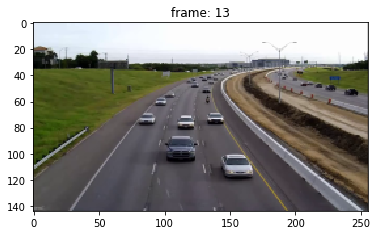

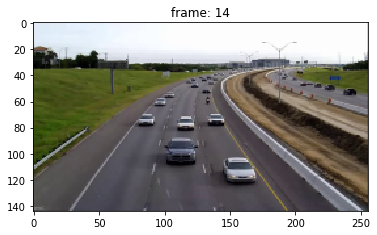

In [4]:
# plot 13th frame
i = 13

for frame in [i, i+1]:
    plt.imshow(cv2.cvtColor(col_images[frame], cv2.COLOR_BGR2RGB))
    plt.title("frame: "+str(frame))
    plt.show()

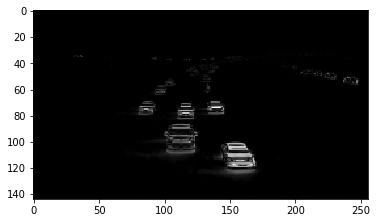

In [5]:
# convert the frames to grayscale
grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)

# plot the image after frame differencing
plt.imshow(cv2.absdiff(grayB, grayA), cmap = 'gray')
plt.show()

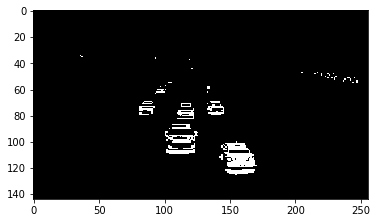

In [6]:
diff_image = cv2.absdiff(grayB, grayA)

# perform image thresholding
ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)

# plot image after thresholding
plt.imshow(thresh, cmap = 'gray')
plt.show()

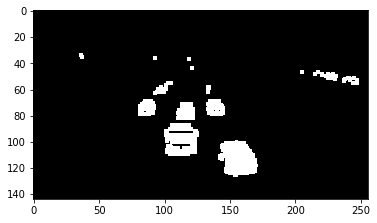

In [7]:
# apply image dilation
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 1)

# plot dilated image
plt.imshow(dilated, cmap = 'gray')
plt.show()

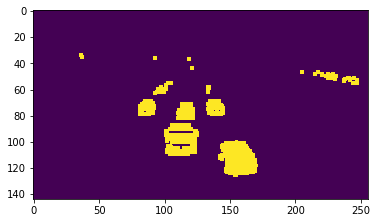

In [8]:
# plot vehicle detection zone
plt.imshow(dilated)
cv2.line(dilated, (0, 80),(256,80),(100, 0, 0))
plt.show()

In [9]:
# find contours
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [11]:
valid_cntrs = []

for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
        valid_cntrs.append(cntr)

# count of discovered contours        
len(valid_cntrs)

6

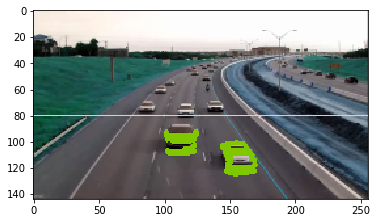

In [12]:
dmy = col_images[13].copy()

cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))
plt.imshow(dmy)
plt.show()

In [13]:
# kernel for image dilation
kernel = np.ones((4,4),np.uint8)

# font style
font = cv2.FONT_HERSHEY_SIMPLEX

# directory to save the ouput frames
pathIn = "contour_frames_3/"

for i in range(len(col_images)-1):
    
    # frame differencing
    grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)
    diff_image = cv2.absdiff(grayB, grayA)
    
    # image thresholding
    ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)
    
    # image dilation
    dilated = cv2.dilate(thresh,kernel,iterations = 1)
    
    # find contours
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    # shortlist contours appearing in the detection zone
    valid_cntrs = []
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
            if (y >= 90) & (cv2.contourArea(cntr) < 40):
                break
            valid_cntrs.append(cntr)
            
    # add contours to original frames
    dmy = col_images[i].copy()
    cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
    
    cv2.putText(dmy, "vehicles detected: " + str(len(valid_cntrs)), (55, 15), font, 0.6, (0, 180, 0), 2)
    cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))
    cv2.imwrite(pathIn+str(i)+'.png',dmy)

In [14]:
# specify video name
pathOut = 'vehicle_detection_v3.mp4'

# specify frames per second
fps = 14.0

In [15]:
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]

In [16]:
files.sort(key=lambda f: int(re.sub('\D', '', f)))

for i in range(len(files)):
    filename=pathIn + files[i]
    
    #read frames
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

In [17]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])

out.release()